In [26]:
from dataloader import open_dataset
import matplotlib.pyplot as plt
import cmocean

In [ ]:
file1 = '/lustre/storeB/project/fou/hi/foccus/experiments/ngpus-2017-24/inference/lam-48h-last.nc'
file2 = '/lustre/storeB/project/fou/hi/foccus/experiments/ngpus-2017-24/inference/lam-48h-step_002016.nc'
t = 8
ds1 = open_dataset(file1, var='temperature_0', time=t, region='lofoten').dataset
ds2 = open_dataset(file2, var='temperature_0', time=t, region='lofoten').dataset

Text(0.5, 1.0, 'Diff last - step 2016')

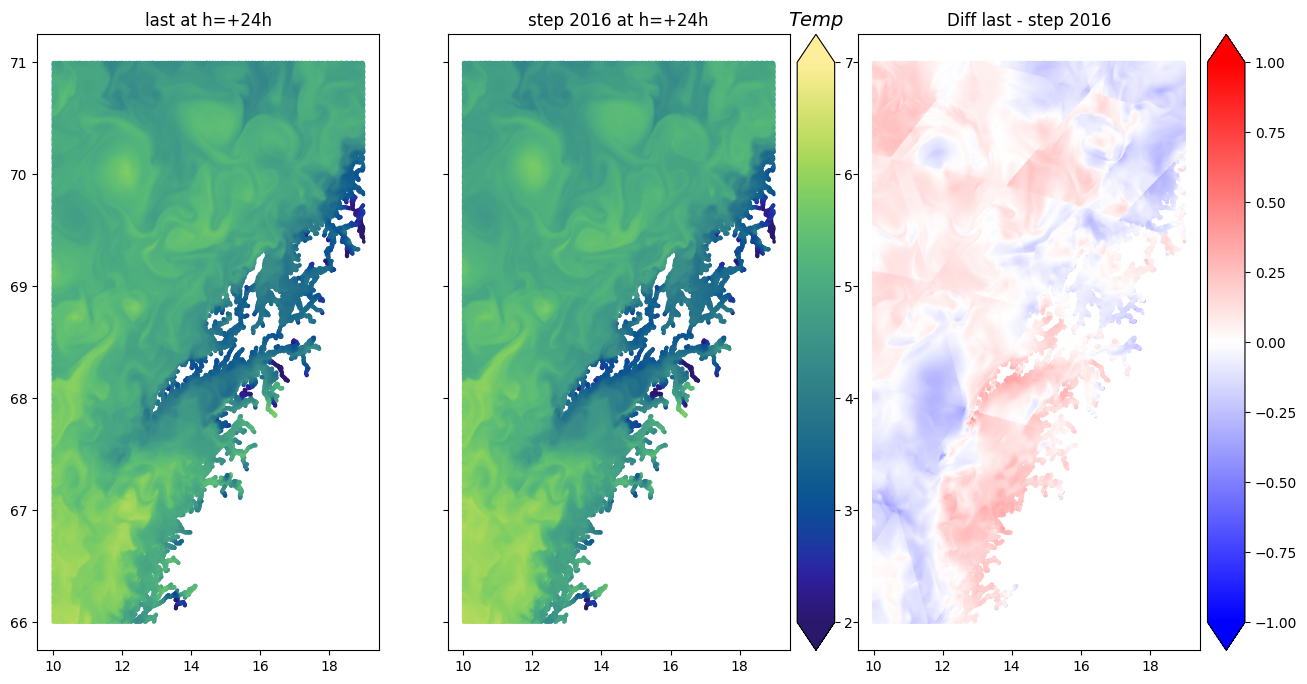

In [ ]:
def plot(var='temperature_0', region='lofoten', t=8):
    ds1 = open_dataset(file1, var=var, time=t, region=region).dataset
    ds2 = open_dataset(file2, var=var, time=t, region=region).dataset
    fig, ax = plt.subplots(1,3, figsize=(15,8), sharey=True)
    ax[0].scatter(ds1.longitude, ds1.latitude, c=ds1[var], s=2, vmin=2, vmax=7, cmap=cmocean.cm.haline)
    im = ax[1].scatter(ds2.longitude, ds2.latitude, c=ds2[var], s=2, vmin=2, vmax=7, cmap=cmocean.cm.haline)
    im2 = ax[2].scatter(ds1.longitude, ds1.latitude, c=ds1[var].values - ds2[var].values, s=2, vmin=-1, vmax=1, cmap='bwr')
    cax = fig.add_axes([ax[1].get_position().x1+0.005, ax[1].get_position().y0, 0.025, ax[1].get_position().height])
    cbar = fig.colorbar(im, ax=ax[1], cax=cax, extend='both')
    cbar.ax.set_title('$Temp$', fontsize=14)
    cax = fig.add_axes([ax[2].get_position().x1+0.005, ax[2].get_position().y0, 0.025, ax[2].get_position().height])
    cbar = fig.colorbar(im2, ax=ax[2], cax=cax, extend='both')
    ax[0].set_title(f'last at h=+{t*3}h')
    ax[1].set_title(f'step 2016 at h=+{t*3}h')
    ax[2].set_title(f'Diff last - step 2016')
    plt.show()